In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df=pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [39]:
df.shape

(150, 6)

In [40]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [41]:
df1=df['Species'].value_counts()

<BarContainer object of 3 artists>

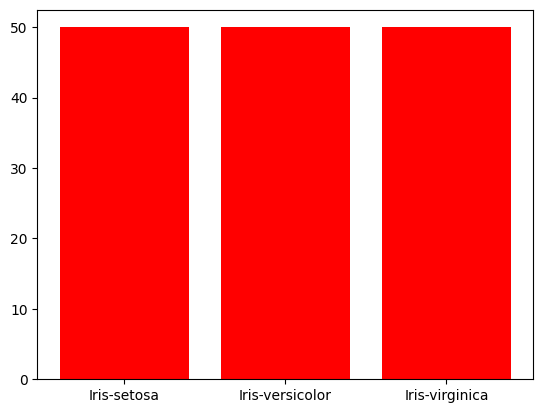

In [42]:
plt.bar(df1.index,df1.values,color='r')

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
cols=['Species']
for i in cols:
    df[i]=lab.fit_transform(df[i])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [44]:
df.drop(['Id'],axis=1,inplace=True)

In [45]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [48]:
# Model creation

from keras.models import Sequential
from keras.layers import Dense

In [49]:
# Architecture

ann=Sequential()

# Input layer
ann.add(Dense(4,activation='relu'))

# Hidden layer
ann.add(Dense(10,activation='relu'))
ann.add(Dense(6,activation='relu'))

# Output layer
ann.add(Dense(3,activation='softmax'))


In [50]:
ann.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Here i used loss as sparse_categorical_crossentropy becuase we are using multclassification file

In [51]:
ann.fit(x_train,y_train,epochs=100,batch_size=12)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5333 - loss: 0.9947
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5429 - loss: 0.9676 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5429 - loss: 0.9447 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5524 - loss: 0.9211 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.8985 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6476 - loss: 0.8768 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6857 - loss: 0.8558 
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.8359 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.8160 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7238 - loss: 0.7972 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7524 - loss: 0.7790 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7714 - loss

In [52]:
ann.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9778 - loss: 0.0701


[0.07005173712968826, 0.9777777791023254]

In [53]:
y_pred=ann.predict(scaler.transform([[4.5,3.2,1.4,0.4]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[0.9833698 , 0.01518725, 0.00144294]], dtype=float32)

In [54]:
y_new=np.argmax(y_pred)
y_new

0

In [55]:
data=lab.inverse_transform([y_new])
data

array(['Iris-setosa'], dtype=object)